# Importing Libraries and Packages


In [1]:
import pandas as pd
import numpy as np
import collections

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import IsolationForest
from numpy import where

 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import os
import category_encoders as ce
from tqdm import tqdm_notebook

Note: you may need to restart the kernel to use updated packages.


# Importing Dataset


In [5]:
df = pd.read_csv('D:/OneDrive - McGill University/Desktop/McGill MMA/Courses/Winter/Adv. Topics in Info. Sys- Enterprise Analytics/Final Proj/SBAnational.csv',low_memory=False)

In [6]:
df.head()

LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   ...  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  \
0  ...          N       Y         NaN         28-Feb-99        $60,000.00    
1  ...          N       Y         NaN         31-May-97        $40,000.00    
2  ...          N       N         NaN         31-Dec-97       $287,000.00    
3  ...          N       Y         NaN         30-Jun-97        $35,000.00    
4  ...          N       N         NaN         14-May-97       $229,000.00    

   BalanceGross  MIS_Status ChgOffPrinGr        GrAppv      SBA_Appv  
0        $0.00        P I F       $0.00    $60,000.00    $48,000.00   
1        $0.00        P I F       $0.00    $40,000.00    $32,000.00   
2        $0.00        P I F       $0.00   $287,000.00   $215,250.00   
3        $0.00        P I F       $0.00    $35,000.00    $28,000.00   
4        $0.00        P I F       $0.00   $229,000.00   $229,000.00   

[5 rows x 27 columns]

# Checking Datatype, Shape, Column Names

In [7]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [8]:
df.shape

(899164, 27)

In [9]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

# Data Dictionary

# Data Exploration

In [10]:
df.describe()

LoanNr_ChkDgt            Zip          NAICS           Term  \
count   8.991640e+05  899164.000000  899164.000000  899164.000000   
mean    4.772612e+09   53804.391241  398660.950146     110.773078   
std     2.538175e+09   31184.159152  263318.312759      78.857305   
min     1.000014e+09       0.000000       0.000000       0.000000   
25%     2.589758e+09   27587.000000  235210.000000      60.000000   
50%     4.361439e+09   55410.000000  445310.000000      84.000000   
75%     6.904627e+09   83704.000000  561730.000000     120.000000   
max     9.996003e+09   99999.000000  928120.000000     569.000000   

               NoEmp       NewExist      CreateJob    RetainedJob  \
count  899164.000000  899028.000000  899164.000000  899164.000000   
mean       11.411353       1.280404       8.430376      10.797257   
std        74.108196       0.451750     236.688165     237.120600   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       1.000000       0.000000       0.000000   
50%         4.000000       1.000000       0.000000       1.000000   
75%        10.000000       2.000000       1.000000       4.000000   
max      9999.000000       2.000000    8800.000000    9500.000000   

       FranchiseCode     UrbanRural  
count  899164.000000  899164.000000  
mean     2753.725933       0.757748  
std     12758.019136       0.646436  
min         0.000000       0.000000  
25%         1.000000       0.000000  
50%         1.000000       1.000000  
75%         1.000000       1.000000  
max     99999.000000       2.000000

In [11]:
# Check for NA's
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [12]:
#Checking different values in the Target Variable (MIS_Status)
collections.Counter(df.MIS_Status).keys()

dict_keys(['P I F', 'CHGOFF', nan])

In [13]:
#Checking the count of different values in the Target Variable (MIS_Status)
collections.Counter(df.MIS_Status).values()

dict_values([739609, 157558, 1997])

In [14]:
#We have only 157558 observations where a company has defaulted(CHGOFF) on the loan. Also we have 1997 NA values in our target variable.

# Data Transformation

In [15]:
df.head()
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [16]:
#Dropping rows having NA's in City, State and Target Variable MIS_Status 
df = df.dropna(axis =0, subset=['City','State','MIS_Status'])

In [17]:
#Target Variable (MIS_Status)- Assigning 1= If loan was Paid Fully, 0= Company defaulted on loan
loan_status = {'P I F': 1,'CHGOFF': 0} 
df.MIS_Status = [loan_status[item] for item in df.MIS_Status]

In [18]:
#Converting the currency values to float. (Currently they are in $)
temp = [21,22,24,25,26] #To convert to float.
for i in temp:
    df[df.columns[i]] = df[df.columns[i]].replace('[\$,]', '', regex=True).astype(float) 

In [19]:
#Column name has no significance in  our analysis hence, dropping it
df = df.drop(axis =1, columns = ['Name','ChgOffDate'])

In [20]:
# changes fiscal year of commitment from object to int
df['ApprovalFY'] = df['ApprovalFY'].replace({'A':'','B':''}, regex = True).astype(int)

# changes new vs existing business from 1 and 2 to 1(new) and 0(existing) for interpretability
df['NewExist'] = df['NewExist'].replace(1,0)
df['NewExist'] = df['NewExist'].replace(2,1)

# change RevLineCR to binary variable

ore = ce.OrdinalEncoder(
mapping=[
{
"col": "RevLineCr",
"mapping": {
"Y": 0,
"N": 1

},
}
]
)
df=ore.fit_transform(df)

# changes LowDoc to binary variable
ore = ce.OrdinalEncoder(
mapping=[
{
"col": "LowDoc",
"mapping": {
"Y": 0,
"N": 1

},
}
]
)
df=ore.fit_transform(df)

# makes franchise a binary variables
df['FranchiseCode'] = df['FranchiseCode'].replace(1,0)
df['FranchiseCode'] = np.where((df.FranchiseCode != 0),1,df.FranchiseCode)
df.rename(columns={"FranchiseCode":"Franchise"},inplace=True)

In [21]:
# makes dataframe with only numeric variables
numeric = ['MIS_Status','ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
           'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 
            'GrAppv', 'SBA_Appv', 'Franchise']
num_df = df[numeric]
num_df.describe().T

count           mean            std     min      25%  \
MIS_Status         897124.0       0.824377       0.380500     0.0      1.0   
ApprovalFY         897124.0    2001.140520       5.911231  1968.0   1997.0   
Term               897124.0     110.844249      78.898420     0.0     60.0   
NoEmp              897124.0      11.412253      73.795441     0.0      2.0   
NewExist           896990.0       0.281546       0.449753     0.0      0.0   
CreateJob          897124.0       8.444699     236.955921     0.0      0.0   
RetainedJob        897124.0      10.807797     237.388075     0.0      0.0   
UrbanRural         897124.0       0.757310       0.646535     0.0      0.0   
RevLineCr          897124.0       0.158232       0.866772    -1.0     -1.0   
LowDoc             897124.0       0.863824       0.361948    -1.0      1.0   
DisbursementGross  897124.0  201600.270399  287812.058404  4000.0  42486.5   
BalanceGross       897124.0       2.996147    1443.800666     0.0      0.0   
GrAppv             897124.0  193061.329976  283438.487668  1000.0  35000.0   
SBA_Appv           897124.0  149780.625813  228563.855408   500.0  21250.0   
Franchise          897124.0       0.057663       0.233106     0.0      0.0   

                        50%       75%         max  
MIS_Status              1.0       1.0         1.0  
ApprovalFY           2002.0    2006.0      2014.0  
Term                   84.0     120.0       569.0  
NoEmp                   4.0      10.0      9999.0  
NewExist                0.0       1.0         1.0  
CreateJob               0.0       1.0      8800.0  
RetainedJob             1.0       4.0      9500.0  
UrbanRural              1.0       1.0         2.0  
RevLineCr               0.0       1.0         1.0  
LowDoc                  1.0       1.0         1.0  
DisbursementGross  100000.0  239000.0  11446325.0  
BalanceGross            0.0       0.0    996262.0  
GrAppv              90000.0  225000.0   5472000.0  
SBA_Appv            62050.0  175000.0   5472000.0  
Franchise               0.0       0.0         1.0

# correlation

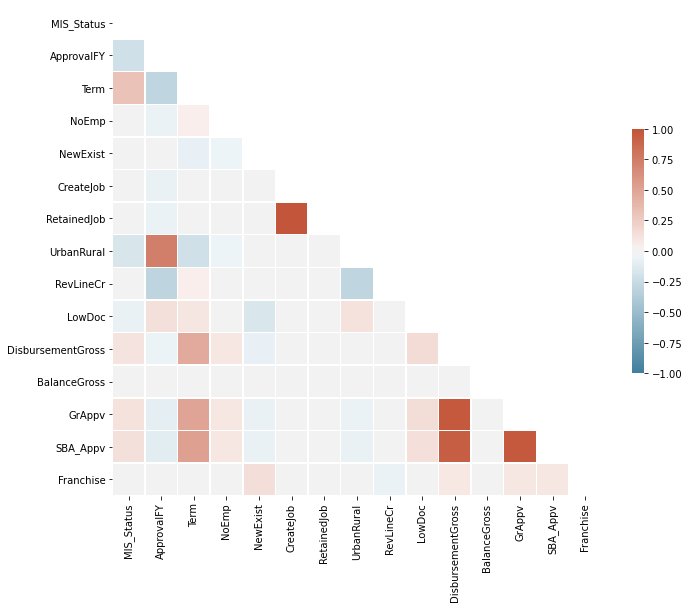

In [22]:
# Compute the correlation matrix
corr = num_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The highest correlations with the target variable were Term, SBA_Appv, and GrAppv .

GrAppv has a -.26 correlation with RevLineCr, which means that banks generally approve smaller amounts for businesses that have a revolving line of credit, which seems odd.

RevLineCr has a -.12 correlation with target variable , meaning that businesses with a revolving line of credit were more likely to default. That might explain why Banks are less willing to loan them larger amounts.

NewExist has a -.021 correlation with target variable. While its only a slightly negative correlation, this still means existing businesses were actually more likely to default on their SBA loans.

Term and DisbursementGross have a strong positive correlation (.47), which means that loans with larger terms are usually larger.

In [23]:
#drop columns that dont add value or affect the prediction
df = df.drop(['LoanNr_ChkDgt','Bank','GrAppv','DisbursementGross', 'City', 'ApprovalDate', 
              'Zip','BankState', 'DisbursementDate','BalanceGross','NAICS'], axis = 1)

In [24]:

from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_notebook_iframe()
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
#from the profiling we notice that SVA_Appv is skewed, so we log it
df['SBA_Appv'] = np.log(df['SBA_Appv'])


In [26]:
df.head(10)

State  ApprovalFY  Term  NoEmp  NewExist  CreateJob  RetainedJob  Franchise  \
0    IN        1997    84      4       1.0          0            0          0   
1    IN        1997    60      2       1.0          0            0          0   
2    IN        1997   180      7       0.0          0            0          0   
3    OK        1997    60      2       0.0          0            0          0   
4    FL        1997   240     14       0.0          7            7          0   
5    CT        1997   120     19       0.0          0            0          0   
6    NJ        1980    45     45       1.0          0            0          0   
7    FL        1997    84      1       1.0          0            0          0   
8    FL        1997   297      2       1.0          0            0          0   
9    CT        1997    84      3       1.0          0            0          0   

   UrbanRural  RevLineCr  LowDoc  MIS_Status  ChgOffPrinGr   SBA_Appv  
0           0        1.0     0.0           1           0.0  10.778956  
1           0        1.0     0.0           1           0.0  10.373491  
2           0        1.0     1.0           1           0.0  12.279555  
3           0        1.0     0.0           1           0.0  10.239960  
4           0        1.0     1.0           1           0.0  12.341477  
5           0        1.0     1.0           1           0.0  12.868116  
6           0        1.0     1.0           0      208959.0  13.122359  
7           0        1.0     0.0           1           0.0  10.491274  
8           0        1.0     1.0           1           0.0  12.340385  
9           0        1.0     0.0           1           0.0  10.933107

In [27]:
# mapping state and industry default rates

state_def = {'MT':.095, 'WY':.1,'VT':.061,'ND':.062,'SD':.106,'ME':.098,
            'NH':.102,'NM':.147,'NE':.181,'AK':.111,'IA':.102,'MN':.082,
            'RI':.062,'WI':.09,'MA':.058,'KS':.116,'WA':.09,'CT':.11,
            'ID':.086,'PA':.092,'OR':.114,'MO':.099,'HI':.093,'OK':.128,
            'MS':.149,'WV':.146,'OH':.111,'AL':.133,'AR':.104,'IN':.142,
            'UT':.075,'DE':.088,'CA':.087,'CO':.108,'VA':0.098,'LA':.134,
            'NC':.105,'TX':.104,'MD':.093,'KY':.123,'SC':.115,'NY':.086,
            'NJ':.094,'AZ':.114,'TN':.115,'MI':.115,'NV':.181,'IL':.095,
            'GA':.108,'DC':.082,'FL':.073} 
df['State'] = df['State'].map(state_def)

df = df.rename(columns={'State':'State Default Rate',})


In [28]:
#Imputing missing values
df=df.fillna(df.median())

In [29]:
y = df['MIS_Status']
X = df.drop(['MIS_Status'], axis = 1)

In [30]:
#removing outliers
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_col = X.select_dtypes(include=numerics)
iforest=IsolationForest(n_estimators=100,contamination=0.02)

pred=iforest.fit_predict(num_col)
score=iforest.decision_function(num_col)


non_anom_index=where(pred==1)
X=X.iloc[non_anom_index]
y=y.iloc[non_anom_index]

In [31]:
#feature selection
lr = LogisticRegression(max_iter=5000)
rfe = RFE(lr, n_features_to_select=1)
model = rfe.fit(X, y)
model.ranking_
rating=pd.DataFrame(list(zip(X.columns,model.ranking_)), columns = ['predictor','ranking'])

In [32]:
rating

predictor  ranking
0   State Default Rate        3
1           ApprovalFY       11
2                 Term        8
3                NoEmp       13
4             NewExist        6
5            CreateJob       10
6          RetainedJob        9
7            Franchise        5
8           UrbanRural        1
9            RevLineCr        7
10              LowDoc        2
11        ChgOffPrinGr       12
12            SBA_Appv        4

In [ ]:
#KNN
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

max=0
wanted=100
for i in tqdm_notebook(range (2,10)):
    knn = KNeighborsClassifier(n_neighbors=i)
    model2 = knn.fit(X_std,y)
    scores=cross_val_score(estimator=model2,X=X_std,y=y,cv=5)
    cross_score=np.average(scores)
    if cross_score>max:
        max=cross_score
        wanted=i
print(max)
print(wanted)

In [37]:
max=0
wanted=100
for i in tqdm_notebook(range (2,6)):
    model3 = MLPClassifier(hidden_layer_sizes=(i),max_iter=10)
    scores = cross_val_score(estimator=model3, X=X, y=y, cv=5)
    cross_score=np.average(scores)
    if cross_score>max:
        max=cross_score
        wanted=i
print(max)
print(wanted)
#CV score is : 0.993
# 5 hidden layers

<ipython-input-37-97e40d3839a6>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range (2,6)):


  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilaye

0.959588492613873
4


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
